STEP 1: IMPORT LIBRARIES


In [ ]:
!pip install tensorflow==2.11.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 20 kB/s 
     |████████████████████████████████| 1.7 MB 55.2 MB/s 
     |████████████████████████████████| 6.0 MB 36.6 MB/s 
     |████████████████████████████████| 439 kB 60.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

ground truth
binary vector
flatten vector


In [ ]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')

print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.9.2
Is using GPU? [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


STEP 2: PRE-PROCESS DATA

---



In [ ]:
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)

    indices = np.concatenate([indices_0, indices_1, indices_2])

    x = x[indices]
    y = y[indices]

    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)

    x = x[indices]
    y = y[indices]

    y = tf.keras.utils.to_categorical(y)


    # 0 -> [1, 0, 0]
    # 1 -> [0, 1, 0]
    # 2 -> [0, 0, 1]

    return x, y


In [ ]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, y_train = get_three_classes(x_train, y_train)
x_test, y_test = get_three_classes(x_test, y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

170498071/170498071 [==============================] - 13s 0us/step
(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


In [ ]:
# airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks
y_train

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
indices_0, _ = np.where(y_train == 0.)
print(indices_0, indices_0.shape)
indices_1, _ = np.where(y_train == 1.)
print(indices_1, indices_1.shape)
indices_2, _ = np.where(y_train == 2.)
print(indices_2, indices_2.shape)

indices = np.concatenate([indices_0, indices_1, indices_2])
print(indices, indices.shape)


[    0     0     1 ... 14998 14999 14999] (30000,)
[    0     1     2 ... 14997 14998 14999] (15000,)
[] (0,)
[    0     0     1 ... 14997 14998 14999] (45000,)


In [ ]:
print(x_train.shape)
print(x_train[indices].shape)

(15000, 32, 32, 3)
(45000, 32, 32, 3)


STEP 3: VISUALIZE EXAMPLES

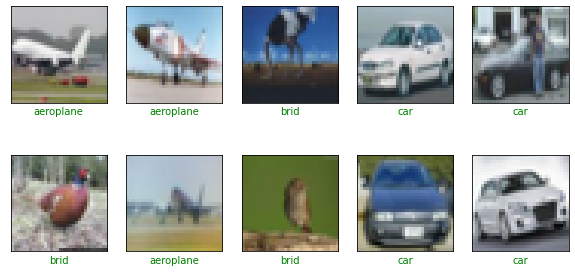

In [ ]:
class_names=['aeroplane', 'car', 'brid']
def show_random_examples(x,y,p):
  indices = np.random.choice(range(x.shape[0]), 10, replace=False)

  x=x[indices]
  y=y[indices]
  p=p[indices]

  plt.figure(figsize=(10,5))

  for i in range(10):
    plt.subplot(2, 5, 1 + i)
    plt.imshow(x[i])
    plt.xticks([])
    plt.yticks([])
    col='green' if np.argmax(y[i])==np.argmax(p[i]) else 'red'
    plt.xlabel(class_names[np.argmax(p[i])], color=col)
  plt.show()
show_random_examples(x_train, y_train, y_train)


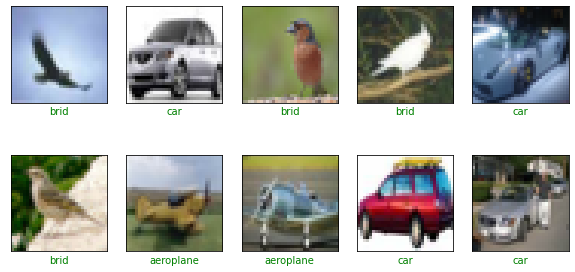

In [ ]:
show_random_examples(x_test, y_test, y_test)

STEP 4: CREATE MODEL

same vs valid

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

def create_model():
    def add_conv_block(model, num_filters):
        model.add(Conv2D(num_filters,3,activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters,3,activation='relu', padding='valid'))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0.5))
        return model
    model=tf.keras.models.Sequential()
    model.add(Input(shape=(32, 32, 3)))

    model = add_conv_block(model, 32)
    model = add_conv_block(model,64)
    model = add_conv_block(model,128)
    model.add(Flatten())
    model.add(Dense(3,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model
model=create_model()


# 32 x 32 x 3
# 32 x 32 x 32
# 30 x 30 x 32
# 15 x 15 x 32
# 15 x 15 x 64
# 13 x 13 x 64
# 6 x 6 x 64
# 6 x 6 x 128
# 4 x 4 x 128
# 2 x 2 x 128

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_3 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 15, 15, 64)       

STEP 5: TRAIN THE MODEL

val accuracy means to stop if no change for 3 epoch bcz patience=3

In [ ]:
h=model.fit(
    x_train/255.,y_train,validation_data=(x_test/255.,y_test),
    epochs=10,batch_size=128,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5),
        tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}.h5',
                                          save_best_only=True,save_weights_only=False,
                                          monitor='val_accuracy'
                                          )
    ]

)

Epoch 1/10
118/118 [==============================] - 3s 20ms/step - loss: 0.9006 - accuracy: 0.6717 - val_loss: 3.2120 - val_accuracy: 0.3333
Epoch 2/10
118/118 [==============================] - 2s 15ms/step - loss: 0.5612 - accuracy: 0.7760 - val_loss: 2.2920 - val_accuracy: 0.4610
Epoch 3/10
118/118 [==============================] - 2s 14ms/step - loss: 0.4965 - accuracy: 0.8033 - val_loss: 2.0657 - val_accuracy: 0.4810
Epoch 4/10
118/118 [==============================] - 2s 14ms/step - loss: 0.4463 - accuracy: 0.8203 - val_loss: 1.6888 - val_accuracy: 0.4647
Epoch 5/10
118/118 [==============================] - 2s 17ms/step - loss: 0.4176 - accuracy: 0.8371 - val_loss: 0.6393 - val_accuracy: 0.7347
Epoch 6/10
118/118 [==============================] - 2s 15ms/step - loss: 0.3663 - accuracy: 0.8579 - val_loss: 0.5420 - val_accuracy: 0.7933
Epoch 7/10
118/118 [==============================] - 2s 15ms/step - loss: 0.3414 - accuracy: 0.8682 - val_loss: 0.4617 - val_accuracy: 0.8157

Final Predictions


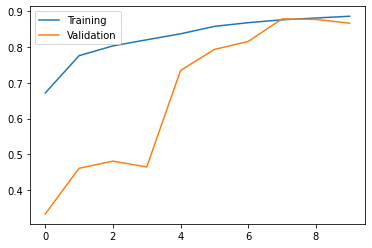

In [ ]:
accs = h.history['accuracy']
val_accs = h.history['val_accuracy']

plt.plot(range(len(accs)), accs, label='Training')
plt.plot(range(len(accs)), val_accs, label='Validation')
plt.legend()
plt.show()

In [ ]:
preds = model.predict(x_test/255.)

94/94 [==============================] - 0s 2ms/step


In [ ]:
preds

array([[9.9891567e-01, 1.8326851e-05, 1.0659519e-03],
       [3.1193498e-01, 1.9281475e-04, 6.8787217e-01],
       [9.8530715e-04, 9.9857402e-01, 4.4065769e-04],
       ...,
       [7.0688349e-01, 8.9621739e-03, 2.8415439e-01],
       [1.0891899e-01, 8.6416912e-01, 2.6911799e-02],
       [3.7398599e-03, 3.8845152e-05, 9.9622130e-01]], dtype=float32)

In [ ]:
np.argmax(preds, axis=1)

array([0, 2, 1, ..., 0, 1, 2])

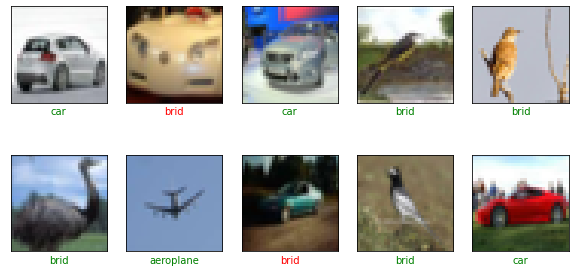

In [ ]:
show_random_examples(x_test, y_test, preds)